In [6]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 13.7 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/behavor detection system predictions/cow_lay_1.jpg: 448x640 1 lying, 417.1ms
Speed: 15.7ms preprocess, 417.1ms inference, 26.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


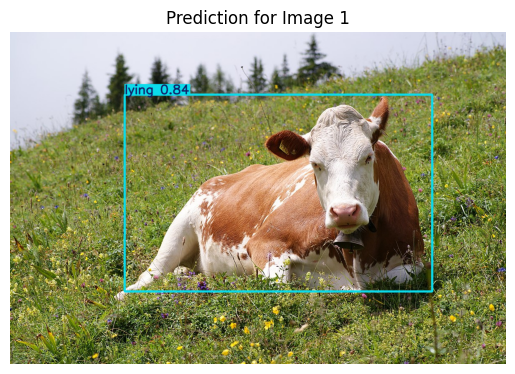


image 1/1 /content/drive/MyDrive/behavor detection system predictions/cow_eat_2.jpeg: 448x640 3 eatings, 221.0ms
Speed: 3.4ms preprocess, 221.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


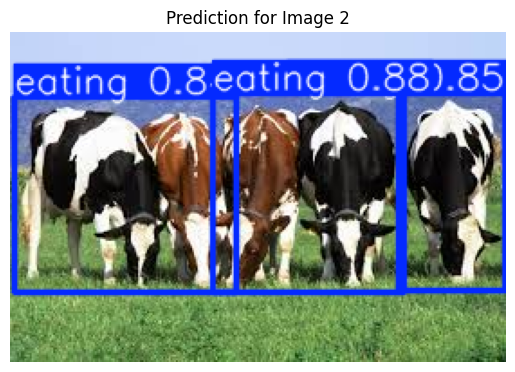


image 1/1 /content/drive/MyDrive/behavor detection system predictions/cow_1_stand_Many_lay.png: 480x640 4 eatings, 4 lyings, 3 standings, 152.0ms
Speed: 2.8ms preprocess, 152.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


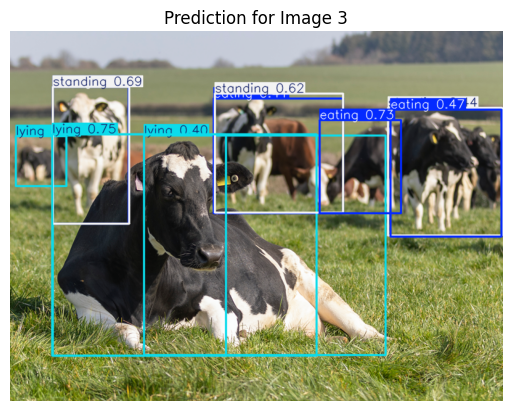

Predictions completed and images saved.


In [7]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLOv8 model from the downloaded 'best.pt' file
model = YOLO('/content/drive/MyDrive/behavor detection system predictions/best.pt')

# List of image paths for predictions
image_paths = [
    '/content/drive/MyDrive/behavor detection system predictions/cow_lay_1.jpg',
    '/content/drive/MyDrive/behavor detection system predictions/cow_eat_2.jpeg',
    '/content/drive/MyDrive/behavor detection system predictions/cow_1_stand_Many_lay.png'
]

# Loop through each image path
for i, image_path in enumerate(image_paths):
    # Run prediction on the image (without save and show)
    results = model.predict(source=image_path, save=True)

    # Optionally display the result using Matplotlib
    for result in results:
        annotated_image = result.plot()
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Prediction for Image {i + 1}")
        plt.axis('off')  # Hide axes
        plt.show()

    # Save the output image with predictions
    output_path = f'predicted_image_{i + 1}.jpg'  # Save with a unique name for each image
    cv2.imwrite(output_path, annotated_image)

print("Predictions completed and images saved.")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!pip install opencv-python
!pip install pytube

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00


In [9]:
!pip install streamlink


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.7/530.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 842.1 kB/s eta 0:00:00


In [ ]:
import subprocess

def get_stream_url(youtube_url):
    # Use streamlink to get the stream URL
    process = subprocess.Popen(
        ['streamlink', youtube_url, 'best', '--stream-url'],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE
    )
    stream_url, error = process.communicate()
    if error:
        raise Exception(f"Error fetching stream URL: {error.decode('utf-8')}")
    return stream_url.decode('utf-8').strip()

# Get the stream URL
youtube_url = 'https://www.youtube.com/live/inDzgZjCxmQ?si=U52fXZ8oEt3T6V0n'
stream_url = get_stream_url(youtube_url)
print(f"Live stream URL: {stream_url}")


In [ ]:
import cv2
from ultralytics import YOLO

# Define the YouTube stream URL
stream_url = 'https://manifest.googlevideo.com/api/manifest/hls_playlist/expire/1729500268/ei/DMAVZ9mNE86c7OsPr76oqQU/ip/35.234.12.185/id/dKFwk3MDu74.1/itag/96/source/yt_live_broadcast/requiressl/yes/ratebypass/yes/live/1/sgoap/gir%3Dyes%3Bitag%3D140/sgovp/gir%3Dyes%3Bitag%3D137/rqh/1/hdlc/1/hls_chunk_host/rr1---sn-un57enel.googlevideo.com/xpc/EgVo2aDSNQ%3D%3D/playlist_duration/30/manifest_duration/30/spc/54MbxehGkKtp9b5dRry28Xc7bxdWsdsb-NbwvXD-1i5k82a7PsbKk35_9iqgAN4/vprv/1/playlist_type/DVR/met/1729478668,/mh/94/mm/44/mn/sn-un57enel/ms/lva/mv/u/mvi/1/pl/24/rms/lva,lva/dover/11/pacing/0/keepalive/yes/fexp/51312688/mt/1729477019/sparams/expire,ei,ip,id,itag,source,requiressl,ratebypass,live,sgoap,sgovp,rqh,hdlc,xpc,playlist_duration,manifest_duration,spc,vprv,playlist_type/sig/AJfQdSswRQIgJ3k8ihiRxGwG_vjaynbCRrRMRJiBuIi-fg4PJOBnFUICIQDwfaUcvDOZnyUQf7oDGYboEaS1qv9M3_HUkzVJ9DfLaQ%3D%3D/lsparams/hls_chunk_host,met,mh,mm,mn,ms,mv,mvi,pl,rms/lsig/ACJ0pHgwRQIgC5Lz6NwDSQLkPUIfq7AdgaxivwwAW7c3-AdacuhmwZYCIQDf74XggG8rZTkm29fUAWNPMx65-g7PqzttksGB-cbQWg%3D%3D/playlist/index.m3u8'  # Replace with the actual URL

# Load your trained model
model = YOLO('/content/drive/MyDrive/behavor detection system predictions/best.pt')

# Capture the live stream using OpenCV
cap = cv2.VideoCapture(stream_url)

if not cap.isOpened():
    print("Error opening video stream")
else:
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            # Run predictions on each frame
            results = model(frame)

            # Initialize cow counts
            cow_counts = {
                "eating": 0,  # Class ID 0
                "lying": 0,   # Class ID 1
                "standing": 0  # Class ID 2
            }

            # Iterate through detected objects
            for result in results:
                if hasattr(result, 'boxes'):
                    for box in result.boxes:
                        # Accessing the class ID from the box directly
                        class_id = int(box.cls[0])  # Class ID should be accessed this way
                        if class_id == 0:  # Eating
                            cow_counts["eating"] += 1
                        elif class_id == 1:  # Lying
                            cow_counts["lying"] += 1
                        elif class_id == 2:  # Standing
                            cow_counts["standing"] += 1


            # Print counts in the console
            print(f"Laying: {cow_counts['lying']}, Eating: {cow_counts['eating']}, Standing: {cow_counts['standing']}")

        else:
            break

cap.release()



0: 384x640 4 lyings, 212.4ms
Speed: 11.4ms preprocess, 212.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Laying: 4, Eating: 0, Standing: 0

0: 384x640 4 lyings, 206.7ms
Speed: 8.4ms preprocess, 206.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Laying: 4, Eating: 0, Standing: 0

0: 384x640 4 lyings, 203.4ms
Speed: 7.6ms preprocess, 203.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Laying: 4, Eating: 0, Standing: 0

0: 384x640 4 lyings, 205.8ms
Speed: 8.6ms preprocess, 205.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Laying: 4, Eating: 0, Standing: 0

0: 384x640 4 lyings, 201.9ms
Speed: 5.6ms preprocess, 201.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Laying: 4, Eating: 0, Standing: 0

0: 384x640 4 lyings, 199.9ms
Speed: 7.3ms preprocess, 199.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
Laying: 4, Eating: 0, Standing: 0

0: 384x640 4 lyings, 204.6